In [1]:
from os import path
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
#import files
battles_df = pd.read_csv('data/battles.csv')

In [3]:
battles_df.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [4]:
battles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 25 columns):
name                  38 non-null object
year                  38 non-null int64
battle_number         38 non-null int64
attacker_king         36 non-null object
defender_king         35 non-null object
attacker_1            38 non-null object
attacker_2            10 non-null object
attacker_3            3 non-null object
attacker_4            2 non-null object
defender_1            37 non-null object
defender_2            2 non-null object
defender_3            0 non-null float64
defender_4            0 non-null float64
attacker_outcome      37 non-null object
battle_type           37 non-null object
major_death           37 non-null float64
major_capture         37 non-null float64
attacker_size         24 non-null float64
defender_size         19 non-null float64
attacker_commander    37 non-null object
defender_commander    28 non-null object
summer                37 non-null flo

In [5]:
battles_df.attacker_outcome.head()

0     win
1     win
2     win
3    loss
4     win
Name: attacker_outcome, dtype: object

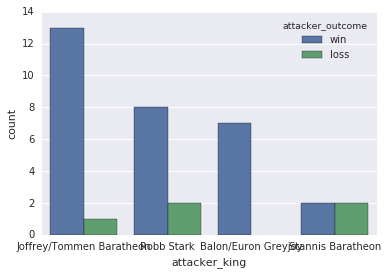

In [6]:
sns.countplot(x='attacker_king',data=battles_df,hue='attacker_outcome')

In [7]:
#convert wins and loss to int
battles_df['attacker_outcome'].replace('win',1,inplace=True)
battles_df['attacker_outcome'].replace('loss',0,inplace=True)

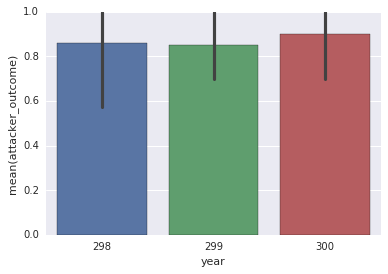

In [8]:
sns.barplot(x='year',y='attacker_outcome', data=battles_df)

In [9]:
#variations on attacker_outcom based on year are very less hence dropping the column
battles_df.drop('year',axis=1,inplace=True)

In [10]:
#name of the battle is insignificant to the outcome
battles_df.drop(['name','battle_number','note'],axis=1,inplace=True)

In [11]:
battles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 21 columns):
attacker_king         36 non-null object
defender_king         35 non-null object
attacker_1            38 non-null object
attacker_2            10 non-null object
attacker_3            3 non-null object
attacker_4            2 non-null object
defender_1            37 non-null object
defender_2            2 non-null object
defender_3            0 non-null float64
defender_4            0 non-null float64
attacker_outcome      37 non-null float64
battle_type           37 non-null object
major_death           37 non-null float64
major_capture         37 non-null float64
attacker_size         24 non-null float64
defender_size         19 non-null float64
attacker_commander    37 non-null object
defender_commander    28 non-null object
summer                37 non-null float64
location              37 non-null object
region                38 non-null object
dtypes: float64(8), object(13)
me

In [12]:
battles_df.attacker_2.head()

0      NaN
1      NaN
2      NaN
3      NaN
4    Tully
Name: attacker_2, dtype: object

In [13]:
pattern = r'[a-z][0-9]'
test = battles_df[~battles_df.attacker_2.isnull()].attacker_2.replace(pattern,1,regex=True)

In [14]:
battles_df.attacker_2.fillna(0,inplace=True)
battles_df.attacker_3.fillna(0,inplace=True)
battles_df.attacker_4.fillna(0,inplace=True)

In [15]:
def find_attacker_allies(my_data):
    col2 = my_data['attacker_2']
    col3 = my_data['attacker_3']
    col4 = my_data['attacker_4']
    number = 0
    if col2 != 0:
        number = number+1
    if col3 != 0:
        number = number+1
    if col4 != 0:
        number = number+1
    
    return number

battles_df['attacker_allies'] = battles_df.apply(find_attacker_allies,axis=1)

In [16]:
#drop attacker_2 , attacker_3, attacker_4
battles_df.drop(['attacker_2','attacker_3','attacker_4'],axis=1,inplace=True)

In [17]:
battles_df.defender_2.fillna(0,inplace=True)
battles_df.defender_3.fillna(0,inplace=True)
battles_df.defender_4.fillna(0,inplace=True)

In [18]:
def find_defender_allies(my_data):
    col2 = my_data['defender_2']
    col3 = my_data['defender_3']
    col4 = my_data['defender_4']
    number = 0
    if col2 != 0:
        number = number+1
    if col3 != 0:
        number = number+1
    if col4 != 0:
        number = number+1
    
    return number

battles_df['defender_allies'] = battles_df.apply(find_defender_allies,axis=1)

battles_df.drop(['defender_2','defender_3','defender_4'],axis=1,inplace=True)

In [19]:
battles_df.head()

,attacker_king,defender_king,attacker_1,defender_1,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,attacker_allies,defender_allies
0,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Tully,1.0,pitched battle,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,0,0
1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Baratheon,1.0,ambush,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,0,0
2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Tully,1.0,pitched battle,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,0,0
3,Robb Stark,Joffrey/Tommen Baratheon,Stark,Lannister,0.0,pitched battle,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,0,0
4,Robb Stark,Joffrey/Tommen Baratheon,Stark,Lannister,1.0,ambush,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,1,0


In [20]:
battles_df.attacker_king.fillna('None',inplace=True)
battles_df.defender_king.fillna('None',inplace=True)
battles_df.battle_type.fillna('None',inplace=True)
battles_df.attacker_commander.fillna('None',inplace=True)
battles_df.defender_commander.fillna('None',inplace=True)
battles_df.location.fillna('None',inplace=True)
battles_df.region.fillna('None',inplace=True)

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
battles_df.attacker_king = le.fit_transform(battles_df.attacker_king)
battles_df.defender_king = le.fit_transform(battles_df.defender_king)
battles_df.battle_type = le.fit_transform(battles_df.battle_type)
battles_df.attacker_commander = le.fit_transform(battles_df.battle_type)
battles_df.defender_commander = le.fit_transform(battles_df.battle_type)
battles_df.location = le.fit_transform(battles_df.battle_type)
battles_df.region = le.fit_transform(battles_df.battle_type)

In [22]:
battles_df.drop(['attacker_1','defender_1'],axis=1,inplace=True)
battles_df.fillna(0,inplace=True)

In [23]:
X = battles_df.drop('attacker_outcome',axis=1)
y = battles_df.attacker_outcome

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [25]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(knn,X,y,cv=10,scoring='accuracy')

/opt/conda/lib/python3.5/site-packages/sklearn/cross_validation.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/cross_validation.py:531: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)


In [26]:
scores.mean()

0.84499999999999997

In [27]:
k_range = range(1,15)
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X,y,cv=10,scoring='accuracy')
    scores_list.append(scores.mean())

/opt/conda/lib/python3.5/site-packages/sklearn/cross_validation.py:531: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)
/opt/conda/lib/python3.5/site-packages/sklearn/cross_validation.py:531: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)
/opt/conda/lib/python3.5/site-packages/sklearn/cross_validation.py:531: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)
/opt/conda/lib/python3.5/site-packages/sklearn/cross_validation.py:531: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of labels for any class cannot

In [28]:
import matplotlib.pyplot as plt

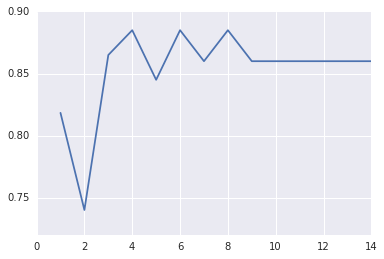

In [29]:
plt.plot(k_range,scores_list)

In [30]:
max(scores_list)

0.88500000000000001

In [31]:
knn = KNeighborsClassifier(n_neighbors=7)
scores = cross_val_score(knn,X,y,cv=10,scoring='accuracy')
scores.mean()

/opt/conda/lib/python3.5/site-packages/sklearn/cross_validation.py:531: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)


0.85999999999999999

In [32]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [33]:
scores = cross_val_score(logreg,X,y,cv=10,scoring='accuracy')
scores.mean()

/opt/conda/lib/python3.5/site-packages/sklearn/cross_validation.py:531: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)


0.85166666666666657